In [7]:
from config import config
import numpy as np

val_label = np.load(config['test_label'])

In [3]:
val_label.shape

(500, 3570)

In [4]:
train_label = np.load(config['train_label'])
train_label.shape

(12000, 3570)

In [9]:
from PIL import Image
import os
image_path = os.path.join(config['train_pic_dir'], '1.bmp')
image = Image.open(image_path).convert('RGB')

In [12]:
print(image)

<PIL.Image.Image image mode=RGB size=165x165 at 0x2204D87E4F0>


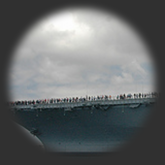

In [13]:
image

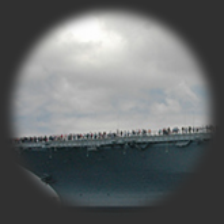

In [20]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224, 224))
])
image_transform = transform(image)
image_transform

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

image_transform = transform(image)
# 绘制转换后的图片
import matplotlib.pyplot as plt
image_transform = image_transform.permute(1, 2, 0)
plt.imshow(image_transform.numpy())
plt.show()

In [17]:
print(image)

<PIL.Image.Image image mode=RGB size=165x165 at 0x2204D87E4F0>
